Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Check duplicate

In [5]:
df.duplicated().sum()

0

Analysis:

- The data have records for 30 day window for March 2017
- There are total 5000 rows of data.
- Max 100 shop_ids
- Mean value for "order_amount" is 3145.128000
- There is no missing value as no NaN appeared in the describe results.
- There are no duplicate rows.

So it appears that the naive calculation of AOV comes from the mean value (average of all the order_amount data) for "order_amount".

To understand more about AOV , referred Shopify blog which explains that this metric is used for businesses to understand what threshold of each customer spend is on an average, and calculated by simply dividing the total revenue by the number of orders.

Let’s look at a hypothetical example: If your store has a total revenue of 2,000 USD split between 100 orders, your average order value is 20USD. This means that, on average, a customer spends 20USD for each purchase from your store.

So, as stated in description,assuming each of these shops sells only one model of shoe at a reasonable price, we are trying to identify customer average spending for a sneaker. If we consider the naive calculation of $3145 AOV, then the price appears higher for shoe purchase. This AOV is calculated by averaging across all 100 shops order amount. To correct, we should calculate the AOV per shop and then average.

#Calculating the AOV per shop

In [6]:
total_revenue_per_shopid = df.groupby(['shop_id'])['order_amount'].agg('sum')
total_revenue_per_shopid.name ='total_revenue'
total_orders_per_shopid = df.groupby(['shop_id'])['total_items'].agg('sum')
total_orders_per_shopid.name = 'total_orders'
df_shopid = pd.concat([total_revenue_per_shopid, total_orders_per_shopid], axis=1)
aov_per_shopid = df_shopid['total_revenue']/df_shopid['total_orders'] 
aov_per_shopid.name = 'aov'
df_per_shopid = pd.concat([total_revenue_per_shopid, total_orders_per_shopid , aov_per_shopid], axis=1)
df_per_shopid

,total_revenue,total_orders,aov
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0
...,...,...,...
96,16830,110,153.0
97,15552,96,162.0
98,14231,107,133.0


In [8]:
df_per_shopid.describe()

,total_revenue,total_orders,aov
count,1.000000e+02,100.000000,100.000000
mean,1.572564e+05,439.360000,407.990000
std,1.216218e+06,3396.366111,2557.462906
min,6.840000e+03,67.000000,90.000000
25%,1.293050e+04,88.000000,132.750000
50%,1.488750e+04,100.000000,153.000000
75%,1.760000e+04,111.250000,168.250000
max,1.199018e+07,34063.000000,25725.000000


-The mean AOV is now $407.99, which also looks at higher range than expected for a single shoe purchase price. This tells there is something off with some of the orders.
-The fact that the mean value looks higher, tells that there might be outliers in the data which is skewing the results.
-There is minimum AOV of 90, which looks like affordable price.
-There is a max AOV of 25725, so definately some shop appears to be selling sneaker for an absurd price.
Until 75 percent of the distribution of the sneaker price (~168 USD), still appears affordable.
-Let us dig more into the data distribution.

##Looking more into data to compare total Items and the order amount distribution.

Text(0, 0.5, 'total_items')

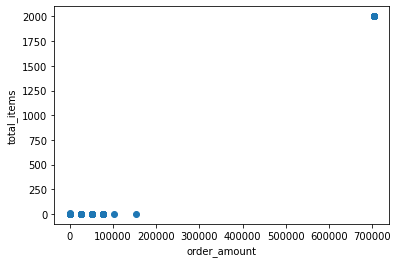

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df['order_amount'],df['total_items'])
plt.xlabel('order_amount')
plt.ylabel('total_items')

Analysis:
We can see that there are some outliers for higher order amount. It maybe fraud or not. Let's inspect into it.

In [16]:
df.sort_values(by=['order_amount'], ascending= False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


We can see that most of the transaction of order amount 70400 are coming from shop_id 42. let us identify who made the purchases and how many items are being purchased.

In [17]:
df_shopid_42 = df[df['shop_id'] == 42]
df_shopid_42.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,51.000000,51.0,51.000000,51.000000,51.000000
mean,2441.921569,42.0,758.588235,235101.490196,667.901961
std,1484.456801,0.0,125.993044,334860.641587,951.308641
min,16.000000,42.0,607.000000,352.000000,1.000000
25%,1366.500000,42.0,607.000000,352.000000,1.000000
50%,2154.000000,42.0,770.000000,704.000000,2.000000
75%,3801.000000,42.0,863.500000,704000.000000,2000.000000
max,4883.000000,42.0,975.000000,704000.000000,2000.000000


Text(0, 0.5, 'total_items')

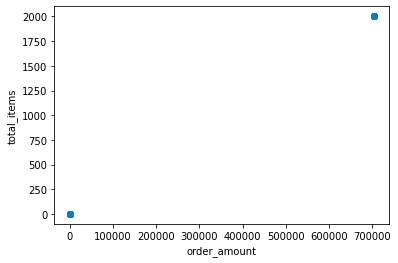

In [20]:
plt.scatter(df_shopid_42['order_amount'],df_shopid_42['total_items'])
plt.xlabel('order_amount')
plt.ylabel('total_items')

Text(0, 0.5, 'user_id')

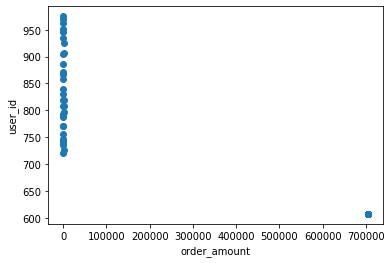

In [21]:
plt.scatter(df_shopid_42['order_amount'],df_shopid_42['user_id'])
plt.xlabel('order_amount')
plt.ylabel('user_id')

In [22]:
df_shopid_42[df_shopid_42['order_amount']==704000]['user_id']

15      607
60      607
520     607
1104    607
1362    607
1436    607
1562    607
1602    607
2153    607
2297    607
2835    607
2969    607
3332    607
4056    607
4646    607
4868    607
4882    607
Name: user_id, dtype: int64

Shop Id 42 Analysis

User id 607 is making purchases of \$704000 and with total items 2000 ~ roughly sneaker price \$352 which seems true for the other normal purchases made at Shop id 42 selling the single sneaker priced (min) at $352.
Shop id 42 prices appears to be on higher end of price range, more than 75% percentile of the distribution across 100 shops (168.25USD from df_per_shopid)
So, is this shop be like high end sneakers place? maybe! This probably does not sound like a fraud activity.

###Let us see if there are similar such instances where other shop ids are charging more than higher amounts.

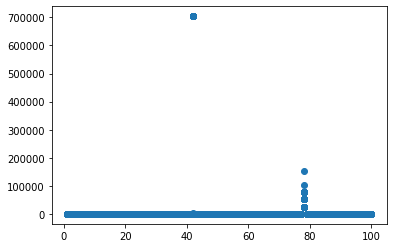

In [23]:
plt.scatter(df['shop_id'],df['order_amount'])

From the chart above comparing shop_id and order_amount, looks like shop_id 42 ( as analysed previously) and shop_id 78 order purchases are the anamolies. Let us dig more into the shop_id 78, and understand what is happening.

In [24]:
df_shopid_78 = df[df['shop_id'] == 78]
df_shopid_78.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,46.000000,46.0,46.000000,46.000000,46.000000
mean,2663.021739,78.0,867.739130,49213.043478,1.913043
std,1338.520020,0.0,81.314871,26472.227449,1.029047
min,161.000000,78.0,707.000000,25725.000000,1.000000
25%,1428.250000,78.0,812.500000,25725.000000,1.000000
50%,2796.500000,78.0,866.500000,51450.000000,2.000000
75%,3720.250000,78.0,935.750000,51450.000000,2.000000
max,4919.000000,78.0,997.000000,154350.000000,6.000000


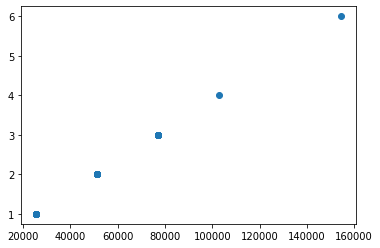

In [25]:
plt.scatter(df_shopid_78['order_amount'],df_shopid_78['total_items'])

Aha, looks like shop_id 78 was making the absurd single sneaker price sales for \$25000, with not many items being sold. Assuming, the shop selling only sneakers and one type of model, this definately alarms of suspicious activity/fraud, and need to be checked.

###Removing the anamolies

In [26]:
clean_df_per_shopid = df_per_shopid.drop([78])
clean_df_per_shopid.describe()

,total_revenue,total_orders,aov
count,9.900000e+01,99.000000,99.000000
mean,1.359782e+05,442.909091,152.262626
std,1.203554e+06,3413.464145,31.263719
min,6.840000e+03,67.000000,90.000000
25%,1.286700e+04,88.000000,132.500000
50%,1.483500e+04,100.000000,153.000000
75%,1.754000e+04,111.500000,167.000000
max,1.199018e+07,34063.000000,352.000000


Removing the records related to only Shop_id 78, it appears that our mean AOV looks good and the data distribution looks normal as well for 25, 50, 75, 100 percentiles.

Let us identify if any other metric is better.

In [28]:
print("Mean AOV:",clean_df_per_shopid['aov'].mean())
print("Median AOV:",clean_df_per_shopid['aov'].median())
print("Mode AOV:",clean_df_per_shopid['aov'].mode()[0])

Mean AOV: 152.26262626262627
Median AOV: 153.0
Mode AOV: 153.0


Looks like median (middle value) and mode (most occuring value) metric either works for this dataset, and very close to the mean AOV value for this cleaned dataset. But we have deleted from our original dataset to derive this. Keeping best practices into consider and not delete original data, let us test how these two metrics work on the original set.

In [29]:
print("Mean AOV:",df_per_shopid['aov'].mean())
print("Median AOV:",df_per_shopid['aov'].median())
print("Mode AOV:",df_per_shopid['aov'].mode()[0])

Mean AOV: 407.99
Median AOV: 153.0
Mode AOV: 153.0


Great!!! so mean AOV of \$407 could be improved by considering the median or mode scores giving average sneaker price at \$153 which sounds much more affordable than mean AOV.

#Question 2

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

How many orders were shipped by Speedy Express in total?
What is the last name of the employee with the most orders?
What product was ordered the most by customers in Germany?



Q 2a). How many orders were shipped by Speedy Express in total?

Answer: 54

In [ ]:
SELECT count(DISTINCT orderID) FROM orders o
inner join shippers s
on o.shipperid = s.shipperid
where s.ShipperName = "Speedy Express”

Q 2b) b. What is the last name of the employee with the most orders?

Answer: Peacock

In [ ]:
SELECT LastName 
from orders o join employees e
on o.employeeID = e.employeeID
group by o.employeeID
order by count(o.OrderID) desc
limit 1

Q 2c. What product was ordered the most by customers in Germany?

Answer: Boston Crab Meat

In [ ]:
select p.ProductName from OrderDetails d
join Orders o
on d.OrderID = o.OrderID
join Customers c
on o.CustomerID = c.CustomerID
join Products p
on p.ProductID = d.ProductID
where c.country = "Germany"
group by p.productID
order by sum(quantity) desc
limit 1